In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-sales-data/Auto Sales data.csv


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[13,6]

In [3]:
automobile_sales_path = '/kaggle/input/auto-sales-data/Auto Sales data.csv'
df = pd.read_csv(automobile_sales_path)
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098952,42.042549,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [5]:
df.describe(include = [object])

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,246,6,7,109,89,88,89,71,73,19,76,72,3
top,14/11/2018,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,38,2541,949,51,259,259,259,304,259,928,259,259,1349


In [6]:
df.describe(include = [object]).T

,count,unique,top,freq
ORDERDATE,2747,246,14/11/2018,38
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928


In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [8]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [10]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

**Check for Null Values**

In [11]:
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

As can be observed, there are no null values in our data.

**Removing Data unneeded for the Analysis**

In [12]:
df=df.drop(['POSTALCODE','CONTACTLASTNAME', 'CONTACTFIRSTNAME','ORDERNUMBER','PHONE', 'ADDRESSLINE1','POSTALCODE'],axis=1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


In [13]:
df.nunique()

QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
CITY                      71
COUNTRY                   19
DEALSIZE                   3
dtype: int64

In [14]:
cols = df.select_dtypes(include = np.number).columns
cols

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object')

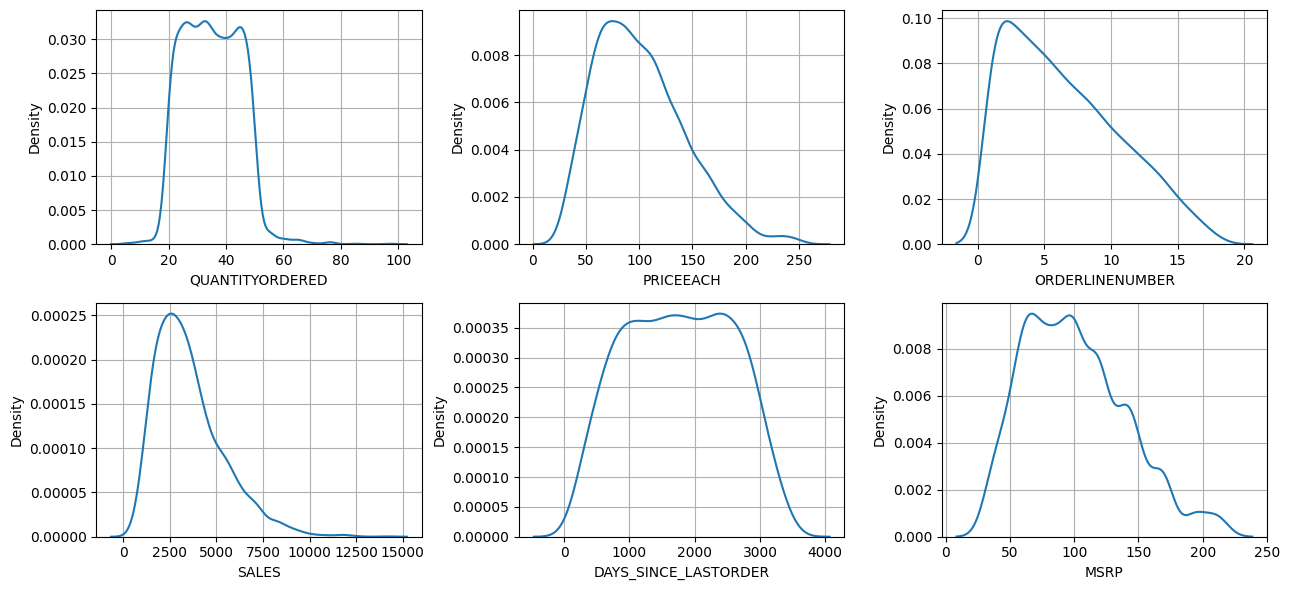

In [15]:
rows=2
columns=3
item=1
for i in cols:
    plt.subplot(rows,columns,item)
    sns.kdeplot(df[i])
    plt.grid()
    item += 1
plt.tight_layout()
plt.show()

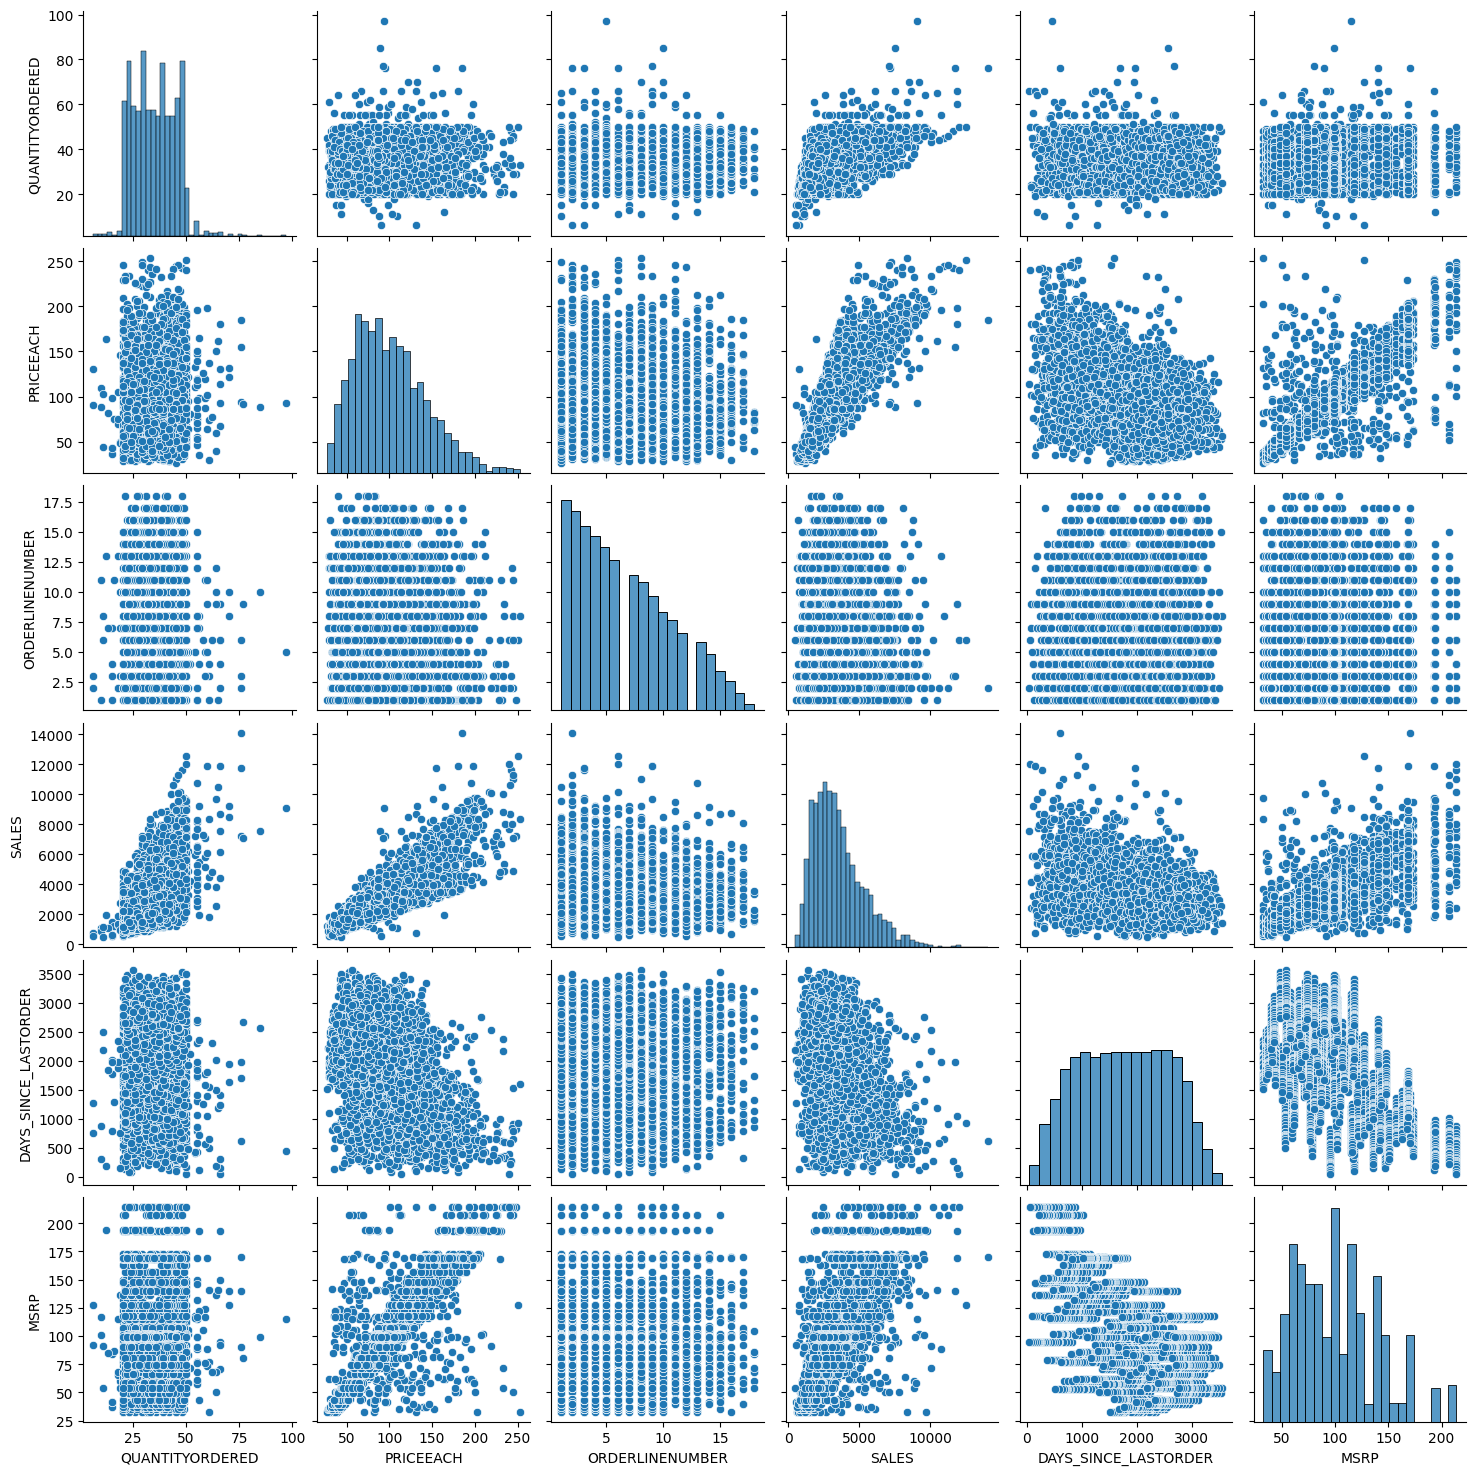

In [16]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.grid()
plt.show()

In [17]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'],yearfirst = True ) # changing the date time format to a suitable format
df

/tmp/ipykernel_19/2228151960.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'],yearfirst = True ) # changing the date time format to a suitable format


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Small
2743,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium
2744,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Medium
2745,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,Toulouse,France,Small


In [18]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


**Customer Behaviour Analysis**

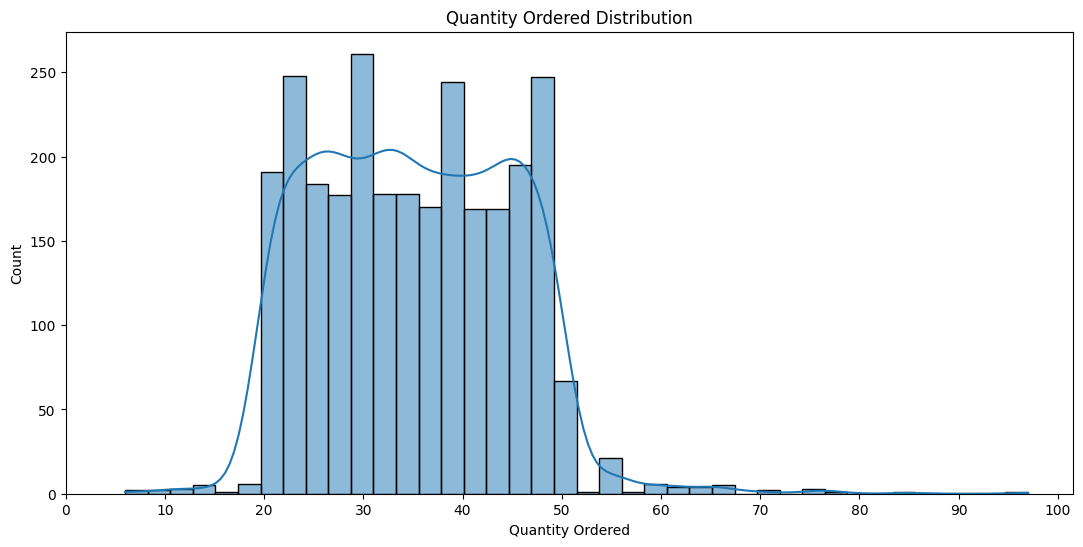

In [19]:
sns.histplot(df['QUANTITYORDERED'], kde=True)
plt.title('Quantity Ordered Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Count')
plt.xticks(range(0,101,10))
plt.show()

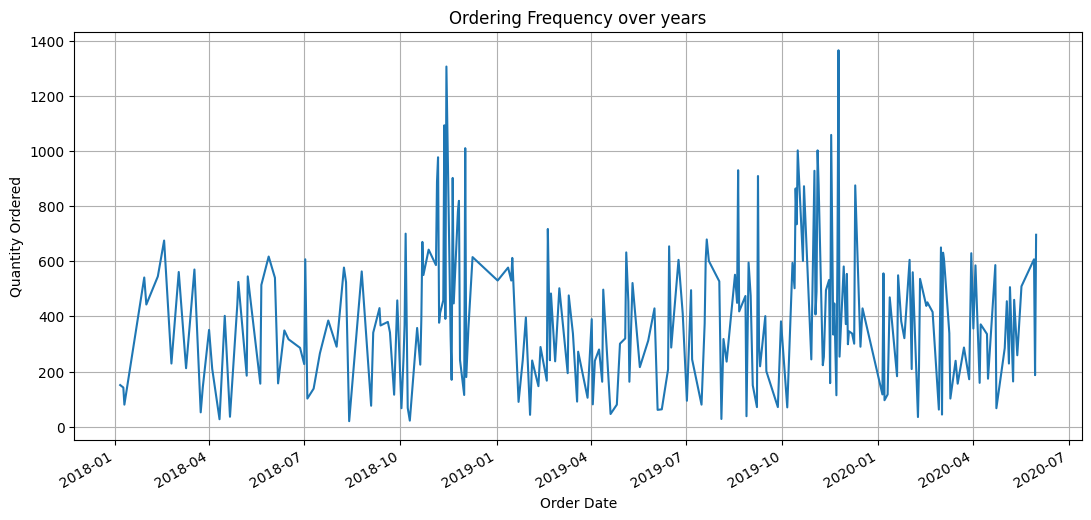

In [20]:
df.groupby('ORDERDATE')['QUANTITYORDERED'].sum().plot(kind = 'line')
plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')
plt.title('Ordering Frequency over years')
plt.grid()
plt.show()

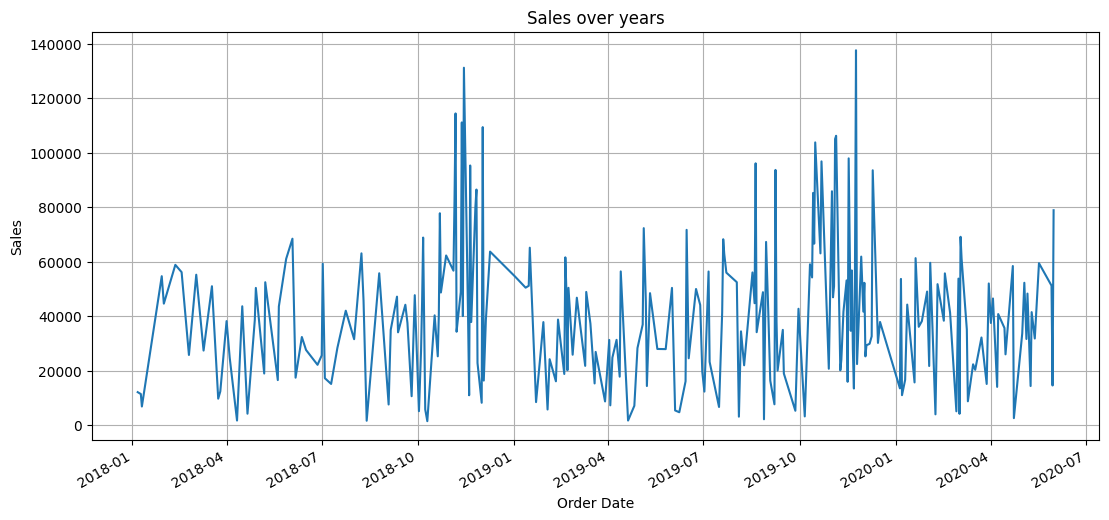

In [21]:
df.groupby('ORDERDATE')['SALES'].sum().plot(kind = 'line')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales over years')
plt.grid()
plt.show()

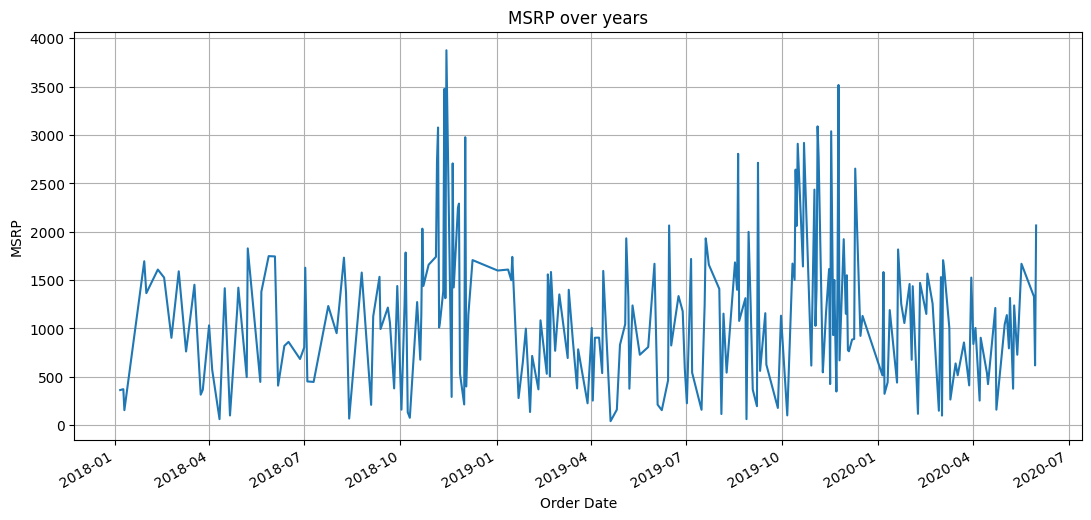

In [22]:
df.groupby('ORDERDATE')['MSRP'].sum().plot(kind = 'line')
plt.xlabel('Order Date')
plt.ylabel('MSRP')
plt.title('MSRP over years')
plt.grid()
plt.show()

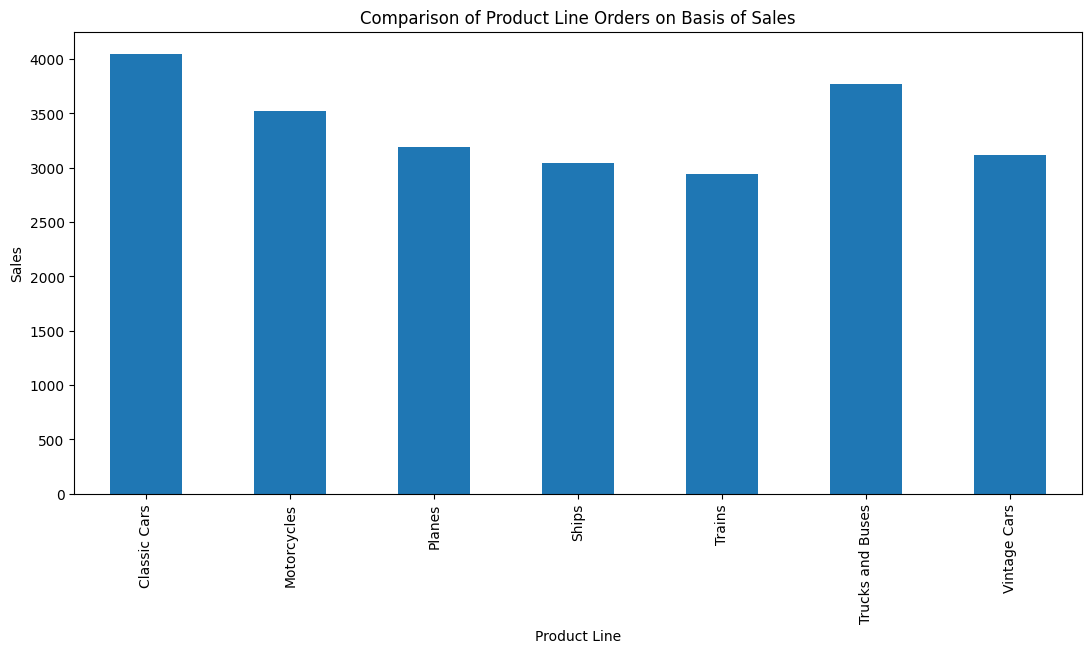

In [23]:
df.groupby('PRODUCTLINE')['SALES'].mean().plot(kind = 'bar')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.title('Comparison of Product Line Orders on Basis of Sales')
#plt.grid()
plt.show()

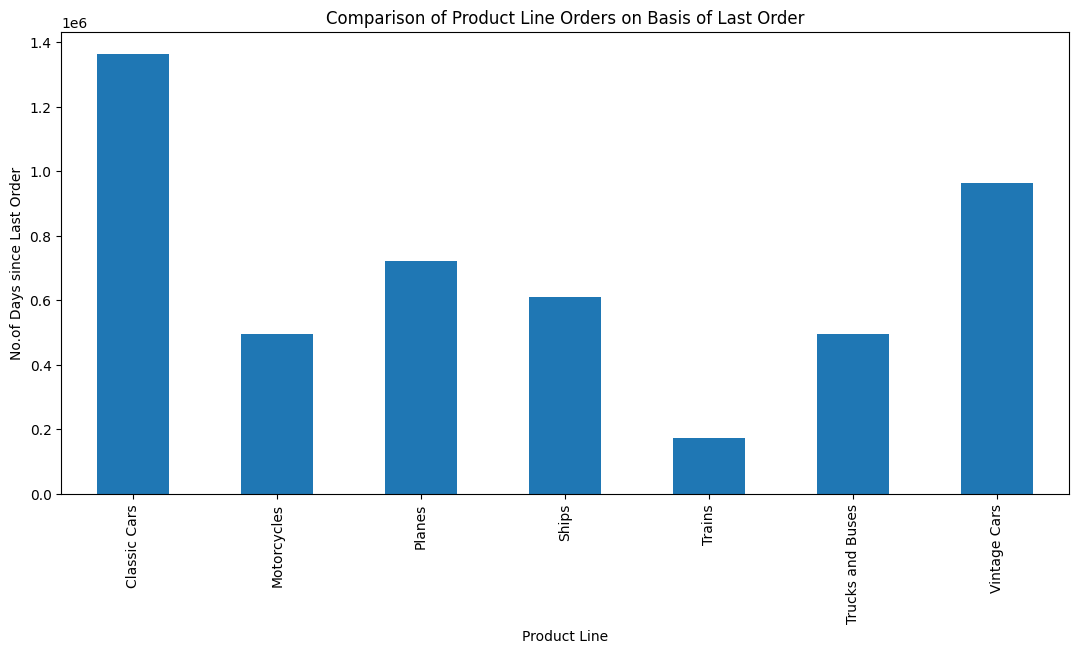

In [24]:
df.groupby('PRODUCTLINE')['DAYS_SINCE_LASTORDER'].sum().plot(kind = 'bar')
plt.xlabel('Product Line')
plt.ylabel('No.of Days since Last Order')
plt.title('Comparison of Product Line Orders on Basis of Last Order')
#plt.grid()
plt.show()

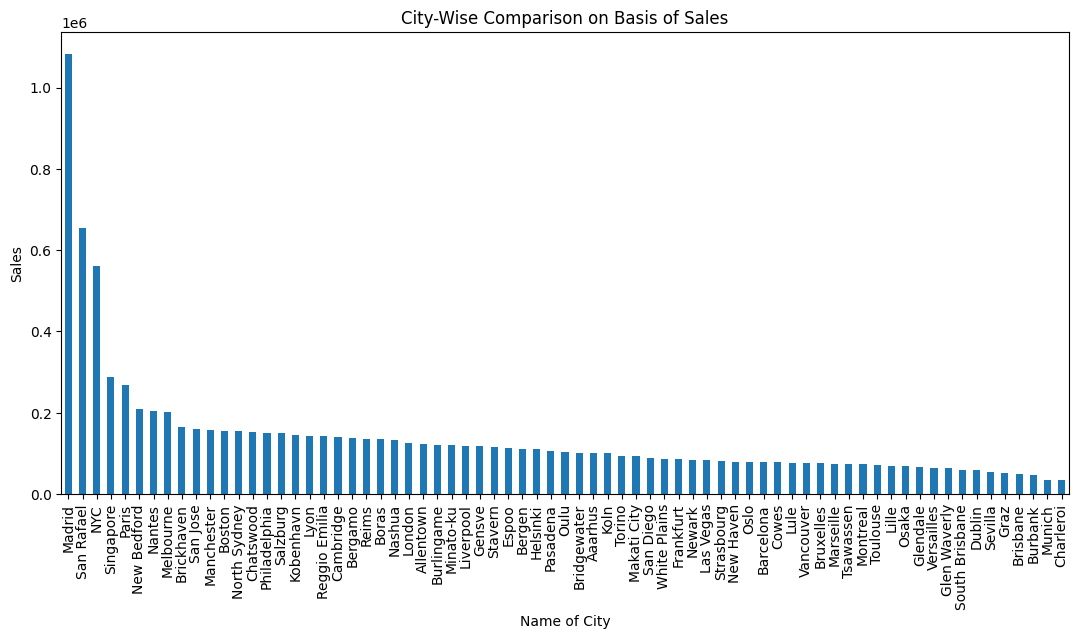

In [25]:
df.groupby('CITY')['SALES'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Name of City')
plt.ylabel('Sales')
plt.title('City-Wise Comparison on Basis of Sales')
#plt.grid()
plt.show()

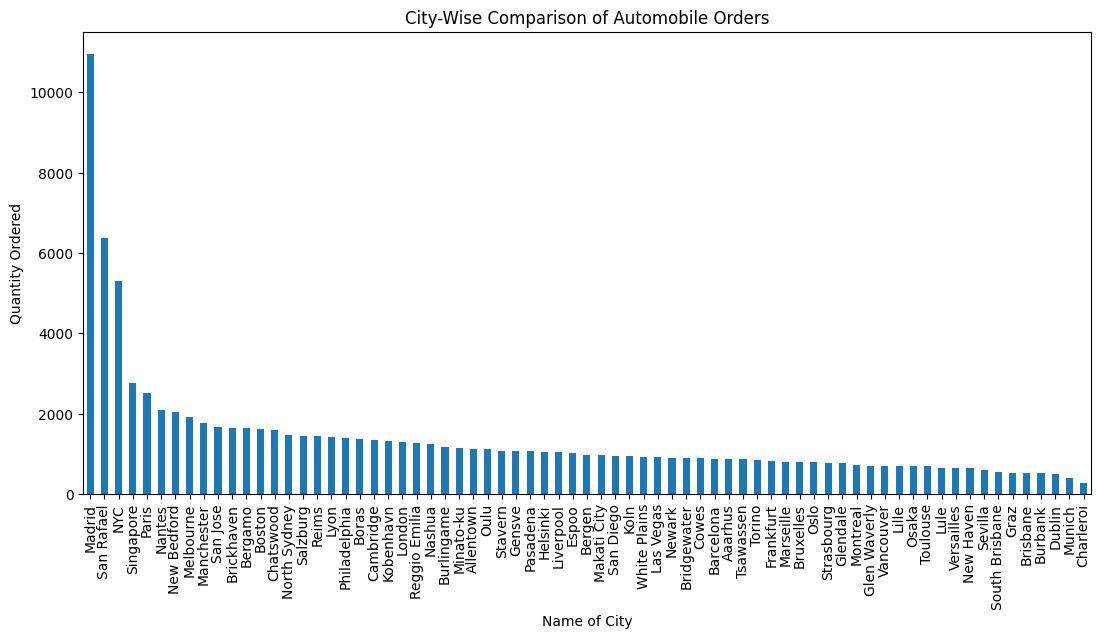

In [26]:
df.groupby('CITY')['QUANTITYORDERED'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Name of City')
plt.ylabel('Quantity Ordered')
plt.title('City-Wise Comparison of Automobile Orders')
#plt.grid()
plt.show()

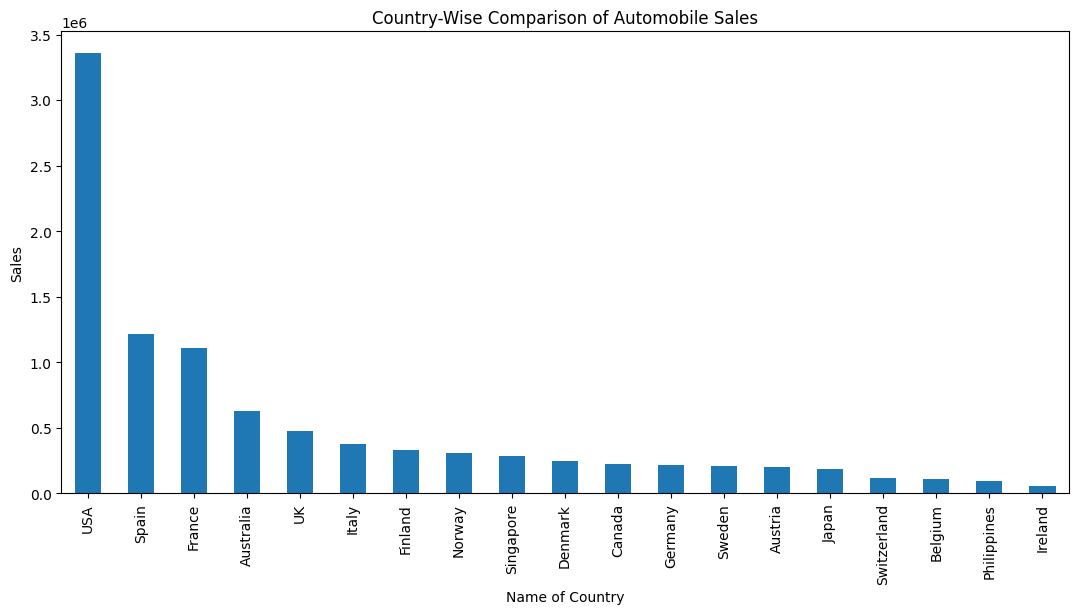

In [27]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Name of Country')
plt.ylabel('Sales')
plt.title('Country-Wise Comparison of Automobile Sales')
#plt.grid()
plt.show()

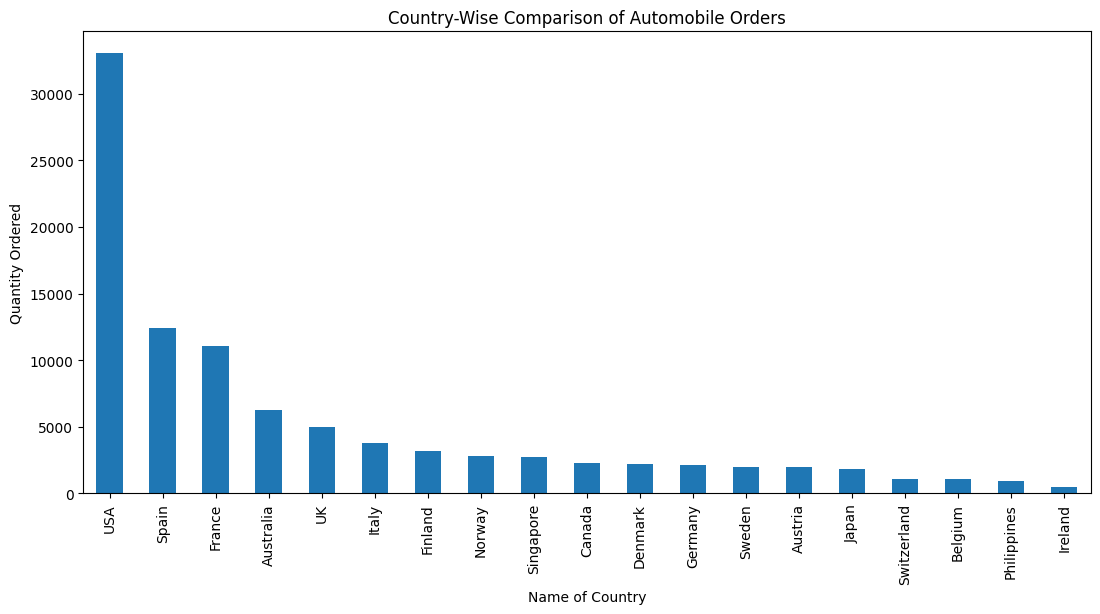

In [28]:
df.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Name of Country')
plt.ylabel('Quantity Ordered')
plt.title('Country-Wise Comparison of Automobile Orders')
#plt.grid()
plt.show()

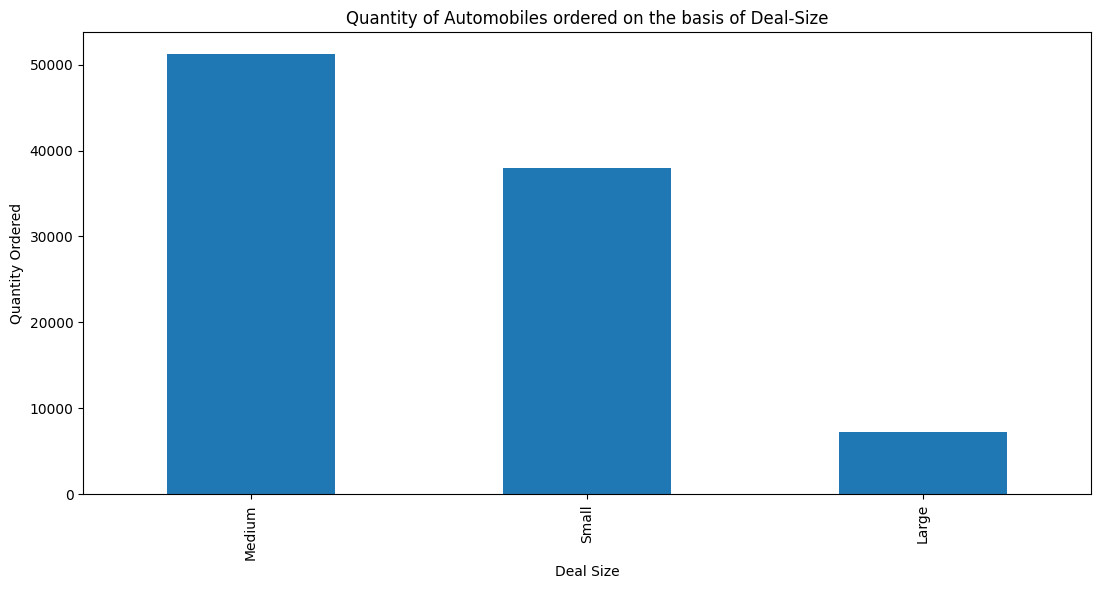

In [29]:
df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Deal Size')
plt.ylabel('Quantity Ordered')
plt.title('Quantity of Automobiles ordered on the basis of Deal-Size')
#plt.grid()
plt.show()

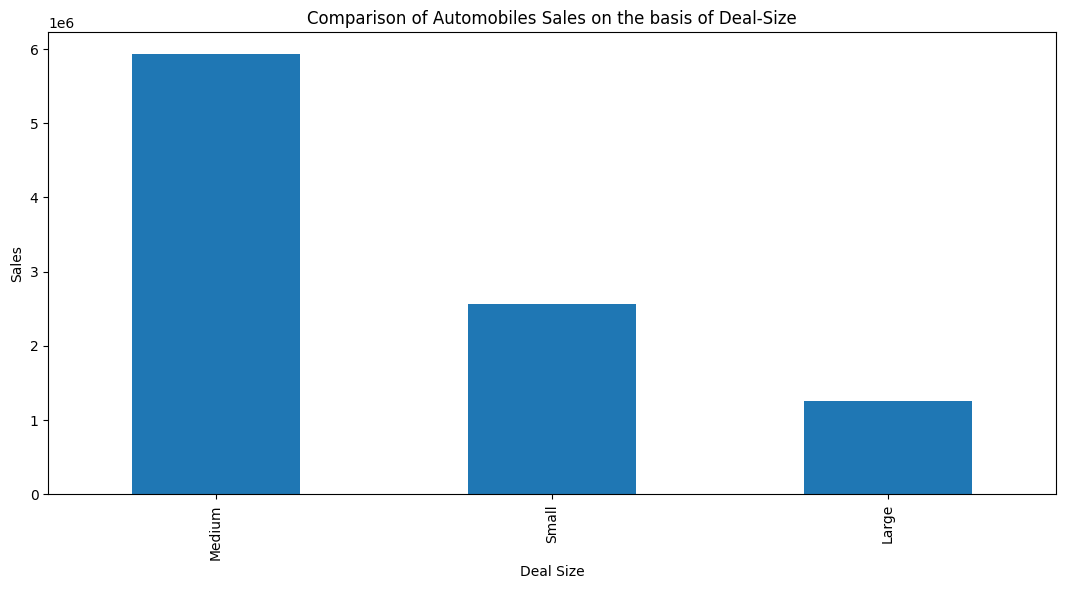

In [30]:
df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.title('Comparison of Automobiles Sales on the basis of Deal-Size')
#plt.grid()
plt.show()

In [31]:
#df.groupby('DEALSIZE')['STATUS'].sum().sort_values(ascending = False).plot(kind = 'bar')
#plt.grid()
#plt.show()

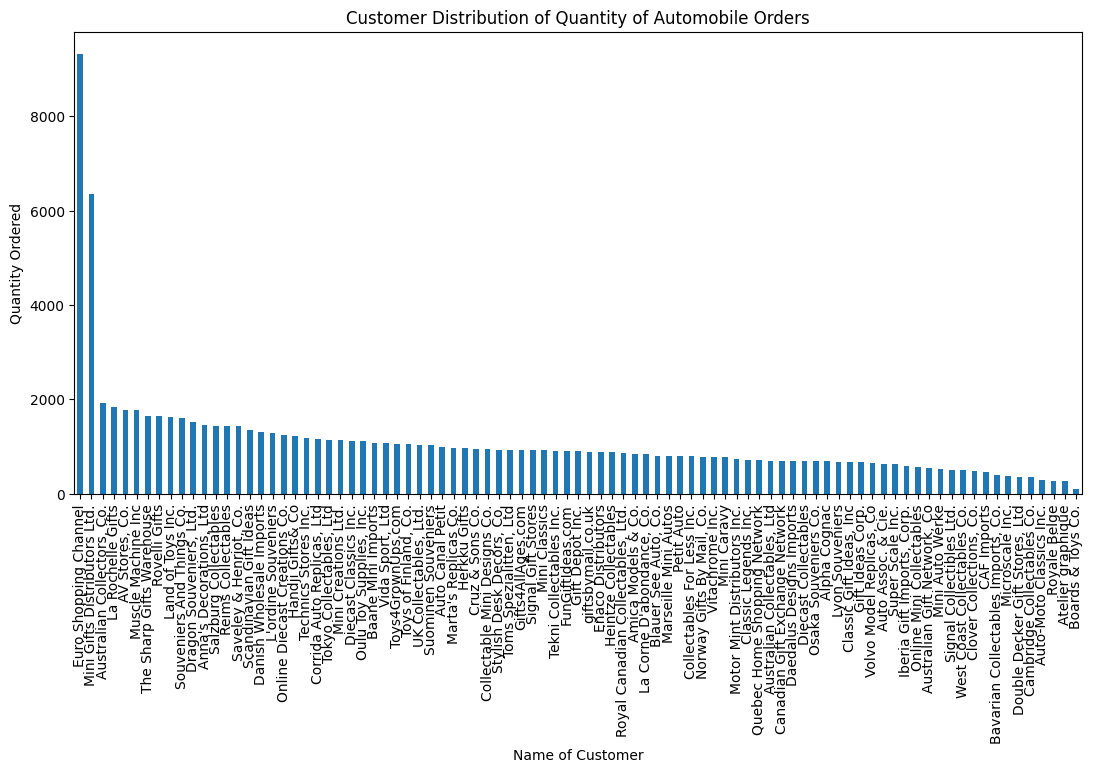

In [32]:
df.groupby('CUSTOMERNAME')['QUANTITYORDERED'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Name of Customer')
plt.ylabel('Quantity Ordered')
plt.title('Customer Distribution of Quantity of Automobile Orders')
#plt.grid()
plt.show()

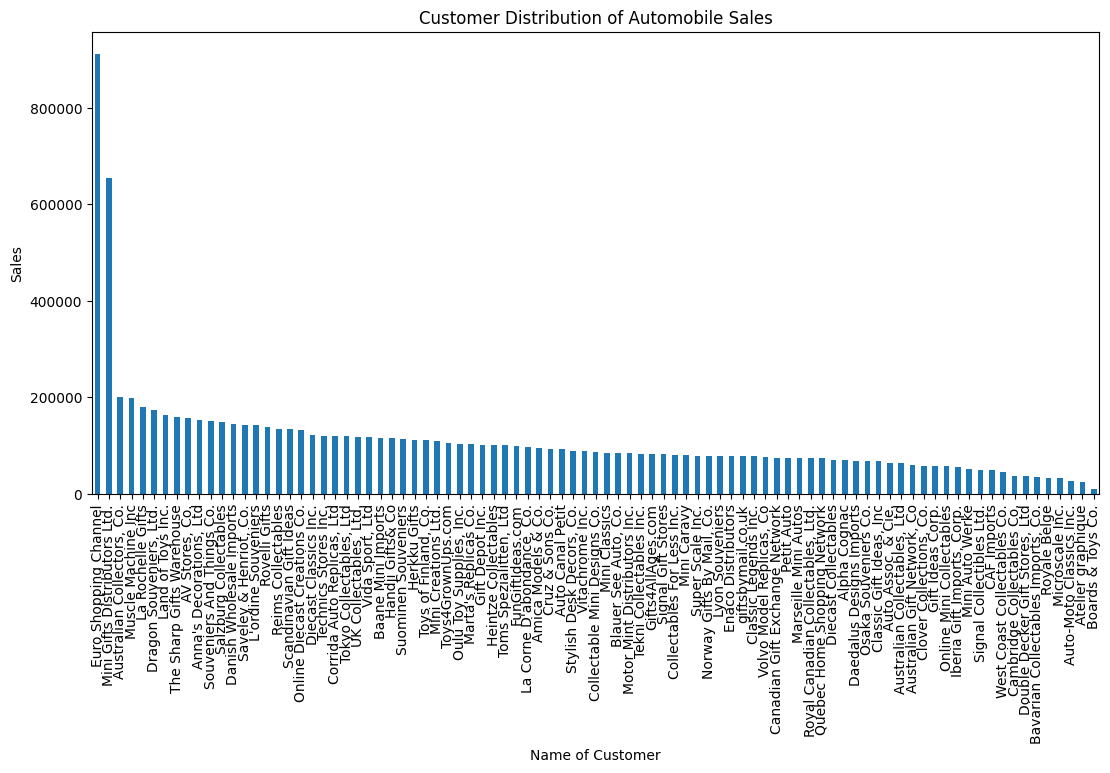

In [33]:
df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Name of Customer')
plt.ylabel('Sales')
plt.title('Customer Distribution of Automobile Sales')
#plt.grid()
plt.show()

In [34]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


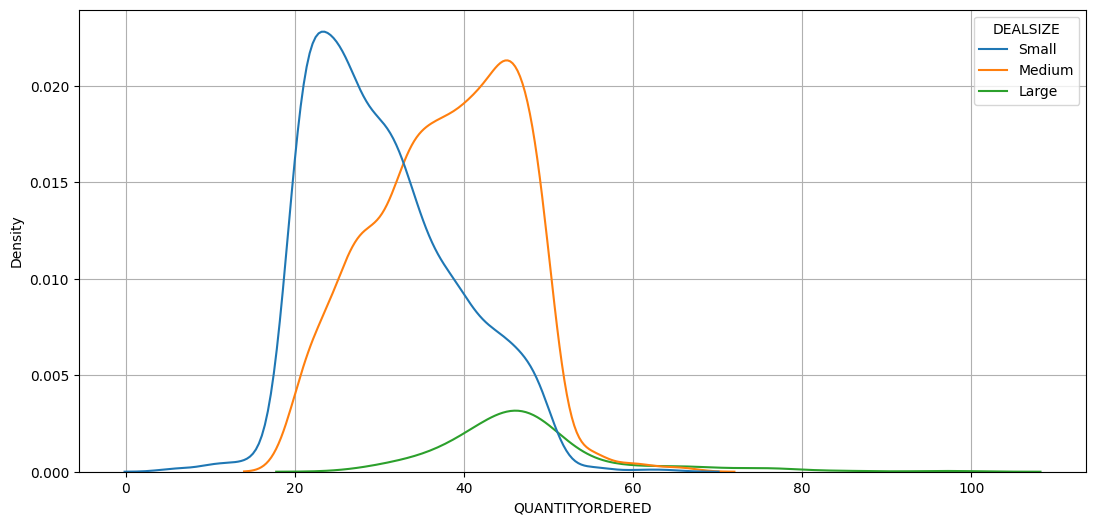

In [35]:
sns.kdeplot(x = 'QUANTITYORDERED', data = df, hue = 'DEALSIZE', warn_singular = False)
plt.grid()
plt.show()

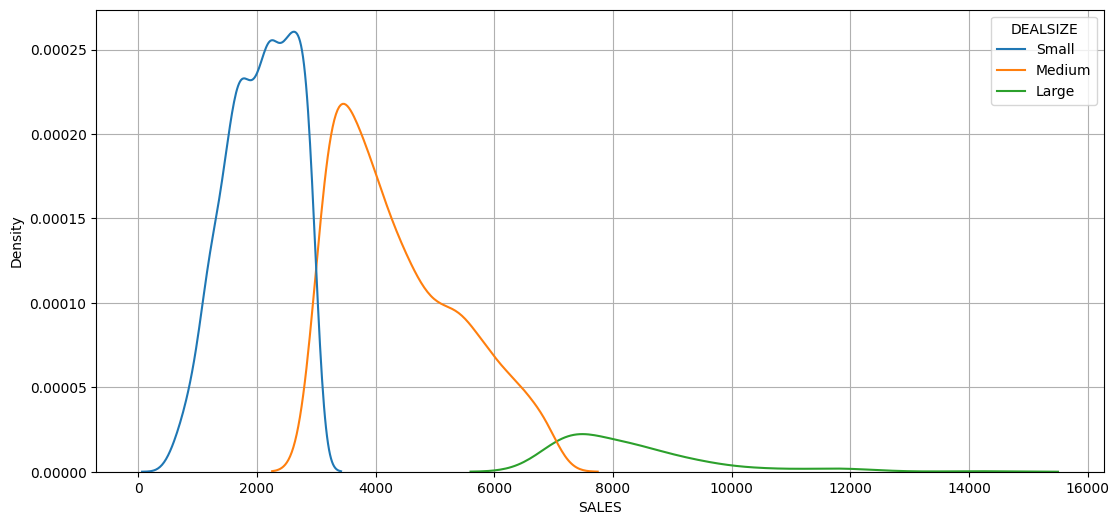

In [36]:
sns.kdeplot(x = 'SALES', data = df, hue = 'DEALSIZE', warn_singular = False)
plt.grid()
plt.show()

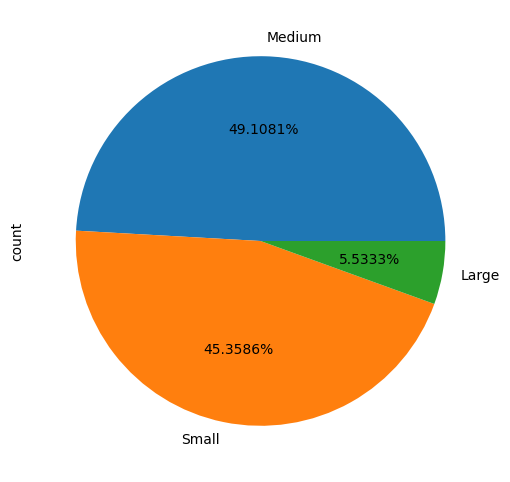

In [37]:
df['DEALSIZE'].value_counts().plot(kind='pie',autopct='%0.4f%%')
plt.show()

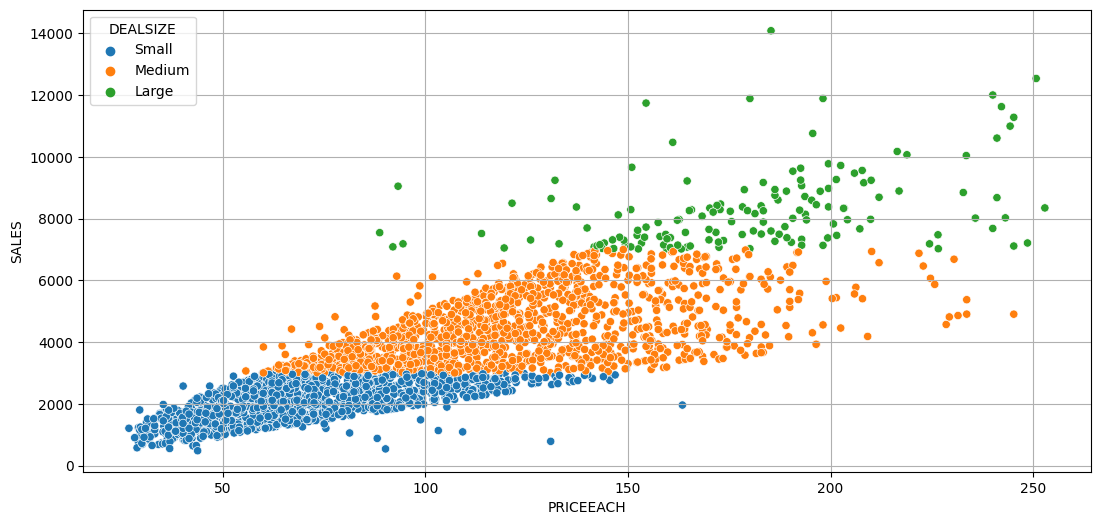

In [38]:
sns.scatterplot(x = 'PRICEEACH', y = 'SALES', data = df, hue = 'DEALSIZE')
plt.grid()
plt.show()